In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

     |████████████████████████████████| 2.2MB 14.1MB/s 
  Found existing installation: grpcio 1.30.0
    Uninstalling grpcio-1.30.0:
      Successfully uninstalled grpcio-1.30.0


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:

Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

@tf.function
def add():
    add_1_operation = tf.add(Matrix_one, Matrix_two)
    return add_1_operation



print ("Defined using tensorflow function :")
add_1_operation = add()
print(add_1_operation)
print ("Defined using normal expressions :")
add_2_operation = Matrix_one + Matrix_two
print(add_2_operation)

Defined using tensorflow function :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)
Defined using normal expressions :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)


In [ ]:

Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

@tf.function
def mathmul():
  return tf.matmul(Matrix_one, Matrix_two)


mul_operation = mathmul()

print ("Defined using tensorflow function :")
print(mul_operation)



Defined using tensorflow function :
tf.Tensor(
[[13 18]
 [18 25]], shape=(2, 2), dtype=int32)


In [ ]:
v = tf.Variable(0)
@tf.function
def increment_by_one(v):
        v = tf.add(v,1)
        return v
for i in range(3):
    v = increment_by_one(v)
    print(v)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
a = tf.constant([5])
b = tf.constant([2])
c = tf.add(a,b)
d = tf.subtract(a,b)


print ('c =: %s' % c)
    
print ('d =: %s' % d)

c =: tf.Tensor([7], shape=(1,), dtype=int32)
d =: tf.Tensor([3], shape=(1,), dtype=int32)


<h1>Linear Regression </h1>

In [ ]:
!pip install grpcio==1.24.3

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
X = np.arange(0.0, 5.0, 0.1)

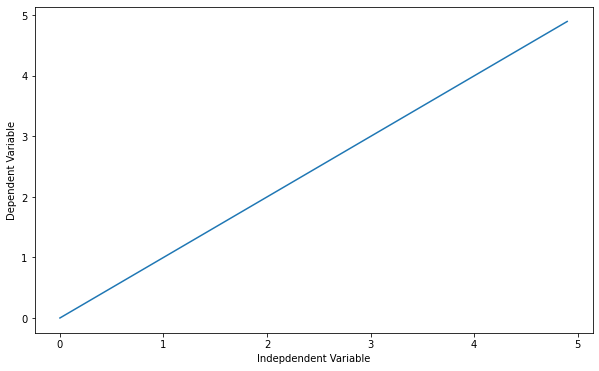

In [ ]:
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-19 22:58:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   211KB/s    in 0.3s    

2020-07-19 22:58:08 (211 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h1>Linear Regreesion between engine size and CO2 emission</h1>

In [ ]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [ ]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

In [ ]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

In [ ]:
learning_rate = 0.01
train_data = []
loss_values =[]
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a, b])


In [ ]:
len(train_data)
len(loss_values)

200

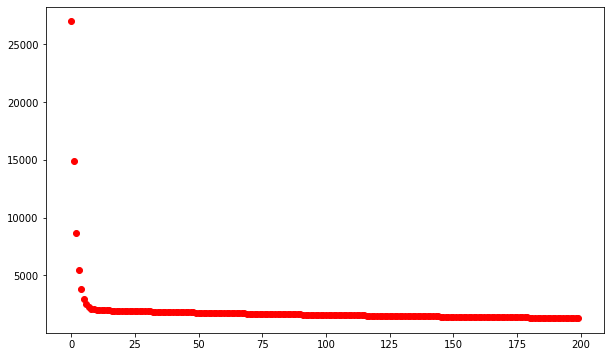

In [ ]:
plt.plot(loss_values, 'ro')

intercept change

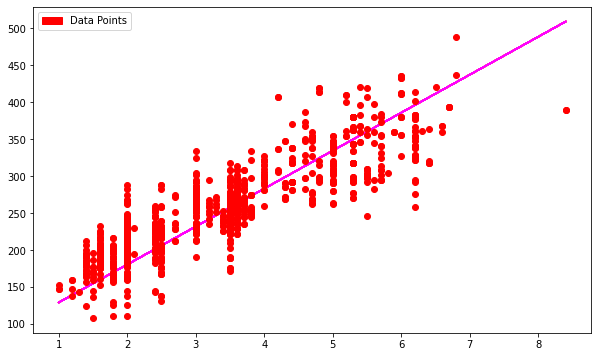

In [ ]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

<h2> Logistic Regression </h2>

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

     |████████████████████████████████| 2.2MB 8.0MB/s 
  Found existing installation: grpcio 1.30.0
    Uninstalling grpcio-1.30.0:
      Successfully uninstalled grpcio-1.30.0


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [ ]:
iris_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
numFeatures = trainX.shape[1]
print('numFeatures is : ', numFeatures )
# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]
print('numLabels is : ', numLabels )

X = tf.Variable( np.identity(numFeatures), tf.TensorShape(numFeatures),dtype='float32') # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.Variable(np.array([1,1,1]),shape=tf.TensorShape(numLabels),dtype='float32') # This will be our correct answers matrix for 3 classes.

numFeatures is :  4
numLabels is :  3


In [ ]:
# X
yGold

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>

In [ ]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [ ]:
#random initialisation
# W
# b
weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))
# weights
bias

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.01081024,  0.00489297, -0.00639092]], dtype=float32)>

In [42]:
def logistic_regression(x):
  # '''
  #   takes all wights multiplies to X 
  #   add to bias
  #   apply sigmoid 
  #   returns matrix
  # '''
    apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias")
    # print("\n\n\nFaggo Fggot\n\n\n")
    # print(add_bias_OP) 
    # print("\n\n\nFaggot\n\n\n")
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    # print(activation_OP)
    # print("\n\n\n\n\nJesuus")
    return activation_OP

<h1>As we have seen before, the function we are going to use is the logistic function (11+𝑒−𝑊𝑥), which is fed the input data after applying weights and bias. In TensorFlow, this function is implemented as the nn.sigmoid function. Effectively, this fits the weighted input with bias into a 0-100 percent curve, which is the probability function we want.</h1>

In [ ]:
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008, decay_steps=trainX.shape[0], decay_rate= 0.95,staircase=True)

In [ ]:
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

In [32]:
# import time
# for i in range(1000):
#   time.sleep(1)

In [ ]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).
    print('y_pred : ',y_pred)
    print('y_true : ',y_true)
    correct_prediction = tf.equal(tf.argmax(y_pred, -1), tf.argmax(y_true, -1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))




In [38]:
X.shape

TensorShape([4, 4])

In [43]:
display_step = 10
# these variable are saved at distance of 10 for graphs visualisation
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
# for i in range(10):
    # print("\n\n\n Prd \n\n\n");

    if i > 1 and diff < .000001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(X, yGold)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(X)

            newLoss = loss_object(pred, yGold)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, yGold)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(acc))


y_pred :  tf.Tensor(
[[0.50587845 0.5121936  0.50709933]
 [0.51292044 0.51014936 0.5100338 ]
 [0.51261926 0.5097181  0.5076862 ]
 [0.51290774 0.5139411  0.50735134]], shape=(4, 3), dtype=float32)
y_true :  <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>
step 0, training accuracy 0.5, loss 0.0789084, change in loss 0.0789084
y_pred :  tf.Tensor(
[[0.50591624 0.5122312  0.50713736]
 [0.51295805 0.51018703 0.51007175]
 [0.51265687 0.50975573 0.5077242 ]
 [0.5129453  0.5139786  0.5073893 ]], shape=(4, 3), dtype=float32)
y_true :  <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>
step 10, training accuracy 0.5, loss 0.0788944, change in loss 1.40369e-05
y_pred :  tf.Tensor(
[[0.505954   0.5122688  0.5071754 ]
 [0.51299566 0.51022464 0.5101097 ]
 [0.5126944  0.50979334 0.50776225]
 [0.51298296 0.51401615 0.5074274 ]], shape=(4, 3), dtype=float32)
y_true :  <tf.Variable 'Variable:0' shape=(3,) dtype=floa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


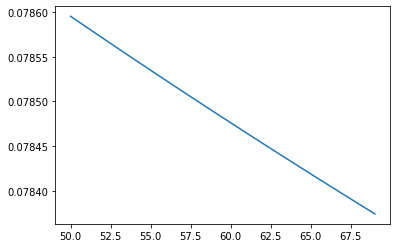

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(loss_values[i-50:i]) for i in range(len(loss_values))])
plt.show()